<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [93]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup
import requests

import os
from tqdm import tqdm
import seaborn as sns
import squarify
from sklearn.neighbors import NearestNeighbors

nlp = spacy.load('en_core_web_lg')
tqdm.pandas()

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [3]:
pd.set_option('max_colwidth', None)

In [39]:
# importing data as a new dataframe
DATA_PATH = os.path.join(os.path.dirname('__file__'), 'data', 'job_listings.csv')

job_listings = pd.read_csv(DATA_PATH)
job_listings.head()



                


b"<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\n</li><li><p>Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><div>\nApply Now</div></div></div></div></div></div></div><div></div>"   
1  b'<div>Job Description<br/>\n<br/>\n<p>As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare journey. You will do so by empowering and improving the next generation of Accolade Applications and user experiences.</p><p><b>\nA day in the life\xe2\x80\xa6</b></p><ul><li>\nWork with a small agile team to design and develop mobile applications in an iterative fashion.</li><li>\nWork with a tight-knit group of development team members in Seattle.</li><li>\nContribute to best practices and help guide the future of our applications.</li><li>\nOperates effectively as a collaborative member of the development team.</li><li>\nOperates effectively as an individual for quick turnaround of enhancements and fixes.</li><li>\nResponsible for meeting expectations and deliverables on time with high quality.</li><li>\nDrive and implement new features within our mobile applications.</li><li>\nPerform thorough manual testing and writing test cases that cover all areas.</li><li>\nIdentify new development tools/approaches that will increase code quality, efficiency, and best practices.</li><li>\nDevelop and champion the the development processes, coding style guidelines, and architectural designs necessary to innovate and maintain great product quality.</li><li>\nEffectively turns design documents and graphics into performant, usable UI.</li><li>\nDemonstrates creative, technical, and analytical skills.</li><li>\nDemonstrates ability to communicate effectively in both technical and business environments</li></ul></div>\n<br/>\n<div>Qualifications<br/>\n<br/>\n<p><b>What we are looking for\xe2\x80\xa6</b></p><ul><li>\nMaster\xe2\x80\x99s Degree in Computer Science, Math, or related field.</li><li>\nComputer Science fundamentals, as illustrated through algorithm design, problem solving, and complexity analysis.</li><li>\nMust have 1+ year real-world experience developing and deploying micro-services or data pipelines</li><li>\nMust have a fundamental understanding of key machine learning concepts, such as accuracy measures, cross-validation, and open source machine learning libraries</li><li>\nFluent in Python and SQL</li><li>\nProficient with writing unit/functional tests and familiar with automation frameworks</li><li>\nExperience with cloud infrastructure, such as AWS or Azure, is a plus.</li><li>\nExperience with distributed data pipelines, such as a Spark, is a plus.</li><li>\nStrong written and oral communication skills.</li><li>\nDesire and willingness to work in an Agile, collaborative, innovative, flexible, and team-oriented environment</li><li>\nHands-on, detail-oriented, methodical &amp; inquisitive</li><li>\nA motivated self-starter with a solid level of experience that quickly grasps complex challenges</li><li>\nA skillful communicator with experience working with technical management teams</li><li>\

In [43]:
def clean_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    description = soup.get_text()
    description = description.strip('b')
    description = description.replace('\\n', ' ')
    description = re.sub('[^a-zA-Z 0-9]', '', description) # removes all the punctuation
    description = re.sub('(xe2x\w\w\w\w\w)', '', description) # removes bytes characters
    description = description.lower()
    
    
    return description

job_listings['description'] = job_listings['description'].apply(clean_html)
job_listings.head()

,Unnamed: 0,description,title
0,0,job requirements conceptual understanding in machine learning models like naixc2xa8ve bayes kmeans svm apriori linear logistic regression neural random forests decision trees knn along with handson experience in at least 2 of them intermediate to expert level coding skills in pythonr ability to write functions clean and efficient data manipulation are mandatory for this role exposure to packages like numpy scipy pandas matplotlib etc in python or ggplot2 dplyr tidyr in r ability to communicate model findings to both technical and nontechnical stake holders hands on experience in sqlhive or similar programming language must show past work via github kaggle or any other published article masters degree in statisticsmathematicscomputer science or any other quant specific field apply now,Data scientist
1,1,job description as a data scientist 1 you will help us build machine learning models data pipelines and microservices to help our clients navigate their healthcare journey you will do so by empowering and improving the next generation of accolade applications and user experiences a day in the life work with a small agile team to design and develop mobile applications in an iterative fashion work with a tightknit group of development team members in seattle contribute to best practices and help guide the future of our applications operates effectively as a collaborative member of the development team operates effectively as an individual for quick turnaround of enhancements and fixes responsible for meeting expectations and deliverables on time with high quality drive and implement new features within our mobile applications perform thorough manual testing and writing test cases that cover all areas identify new development toolsapproaches that will increase code quality efficiency and best practices develop and champion the the development processes coding style guidelines and architectural designs necessary to innovate and maintain great product quality effectively turns design documents and graphics into performant usable ui demonstrates creative technical and analytical skills demonstrates ability to communicate effectively in both technical and business environments qualifications what we are looking for masters degree in computer science math or related field computer science fundamentals as illustrated through algorithm design problem solving and complexity analysis must have 1 year realworld experience developing and deploying microservices or data pipelines must have a fundamental understanding of key machine learning concepts such as accuracy measures crossvalidation and open source machine learning libraries fluent in python and sql proficient with writing unitfunctional tests and familiar with automation frameworks experience with cloud infrastructure such as aws or azure is a plus experience with distributed data pipelines such as a spark is a plus strong written and oral communication skills desire and willingness to work in an agile collaborative innovative flexible and teamoriented environment handson detailoriented methodical inquisitive a motivated selfstarter with a solid level of experience that quickly grasps complex challenges a skillful communicator with experience working with technical management teams a service oriented person who thinks customer first fast fail entrepreneurial spirit thrives in a fastpaced environment where continuous improvement is the norm and the bar for quality is extremely high excited by the challenges of working in a product team undergoing rapid international growth additional information what is important to us creating an enduring company that is hyperfocused on our culture and making a meaningful impact in the lives of our employees members and customers the secret to our success is we find joy and purpose in serving others making a difference in our members and customers lives is what we do even when its hard we do the right thing for the ri

## 2) Use Spacy to tokenize the listings 

In [49]:
# function to get lemmas from text
def get_lemmas(text):
    doc = nlp(text)

    lemma_list = [token.lemma_ for token in doc if (token.is_stop != True) and
    (token.is_punct != True)]
    
    return lemma_list

In [53]:
# getting lemmas for our data
job_listings['lemmas'] = job_listings['description'].progress_apply(get_lemmas)
job_listings.head()

100%|██████████| 426/426 [02:47<00:00,  2.55it/s]


,Unnamed: 0,description,title,lemmas
0,0,job requirements conceptual understanding in machine learning models like naixc2xa8ve bayes kmeans svm apriori linear logistic regression neural random forests decision trees knn along with handson experience in at least 2 of them intermediate to expert level coding skills in pythonr ability to write functions clean and efficient data manipulation are mandatory for this role exposure to packages like numpy scipy pandas matplotlib etc in python or ggplot2 dplyr tidyr in r ability to communicate model findings to both technical and nontechnical stake holders hands on experience in sqlhive or similar programming language must show past work via github kaggle or any other published article masters degree in statisticsmathematicscomputer science or any other quant specific field apply now,Data scientist,"[job, requirement, conceptual, understanding, machine, learning, model, like, naixc2xa8ve, bayes, kmeans, svm, apriori, linear, logistic, regression, neural, random, forest, decision, tree, knn, handson, experience, 2, intermediate, expert, level, coding, skill, pythonr, ability, write, function, clean, efficient, datum, manipulation, mandatory, role, exposure, package, like, numpy, scipy, panda, matplotlib, etc, python, ggplot2, dplyr, tidyr, r, ability, communicate, model, finding, technical, nontechnical, stake, holder, hand, experience, sqlhive, similar, programming, language, past, work, github, kaggle, publish, article, master, degree, statisticsmathematicscomputer, science, quant, specific, field, apply]"
1,1,job description as a data scientist 1 you will help us build machine learning models data pipelines and microservices to help our clients navigate their healthcare journey you will do so by empowering and improving the next generation of accolade applications and user experiences a day in the life work with a small agile team to design and develop mobile applications in an iterative fashion work with a tightknit group of development team members in seattle contribute to best practices and help guide the future of our applications operates effectively as a collaborative member of the development team operates effectively as an individual for quick turnaround of enhancements and fixes responsible for meeting expectations and deliverables on time with high quality drive and implement new features within our mobile applications perform thorough manual testing and writing test cases that cover all areas identify new development toolsapproaches that will increase code quality efficiency and best practices develop and champion the the development processes coding style guidelines and architectural designs necessary to innovate and maintain great product quality effectively turns design documents and graphics into performant usable ui demonstrates creative technical and analytical skills demonstrates ability to communicate effectively in both technical and business environments qualifications what we are looking for masters degree in computer science math or related field computer science fundamentals as illustrated through algorithm design problem solving and complexity analysis must have 1 year realworld experience developing and deploying microservices or data pipelines must have a fundamental understanding of key machine learning concepts such as accuracy measures crossvalidation and open source machine learning libraries fluent in python and sql proficient with writing unitfunctional tests and familiar with automation frameworks experience with cloud infrastructure such as aws or azure is a plus experience with distributed data pipelines such as a spark is a plus strong written and oral communication skills desire and willingness to work in an agile collaborative innovative flexible and teamoriented environment handson detailoriented methodical inquisitive a motivated selfstarter with a solid level of experience that quickly grasps complex challenges a skillful communicator with exp

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [72]:
# used lemmas because it is over 1000 less columns
text_list = [' '.join(text) for text in job_listings['lemmas']]

vect = CountVectorizer()
vect.fit(text_list)
dtm = vect.transform(text_list)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

tion   benefit offer competitive compensation medical dental vision basic life insurance important benefit opportunity work incredibly exciting rapidly grow firm good group highly dedicated competent professional deliver result fun way', 'contractthe role largely operational support product pricing analytic activity product analytic team work segment manager deep dive biz performance deliver presentation assessment area create maintain tool model order report facilitate decision making biz performance prepare present executive deck project update adhoc analysis partner regional counterpart aspect pricingcosting profitability create automate process delivery regular reporting work provide adhoc analysis data pull require support segment customer interface communication delivery quality value proposition escalation take ownership quality work deliverable process adherence guidance learn apply basic knowledge give functional area   technical skill set expert datum access analysis develop 

,00,02,02115,03,030,030547069,031819,032519,041819,06366,...,zfs,zheng,zillow,zillows,zogsports,zone,zoom,zuckerberg,zurich,zurichs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

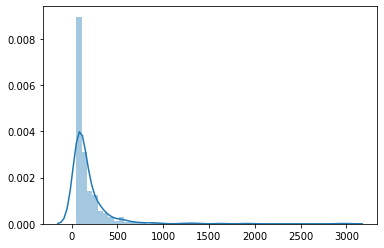

In [81]:
# distribution of the top 500 most common words
word_sums = dtm.sum().sort_values(ascending=False)
sns.distplot(word_sums[:500]);

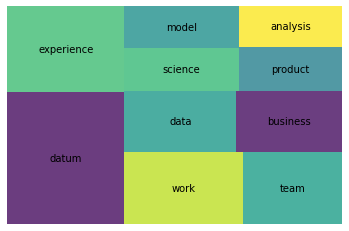

In [90]:
# vizualization of top 10 most common words
wc_top10 = word_sums[:10]

squarify.plot(sizes=wc_top10, label=wc_top10.index, alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [94]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [99]:
tfidf = TfidfVectorizer(stop_words='english',
             ngram_range=(1,2),
             max_df=.97,
             min_df=3,
             max_features=5000
             )

dtm = tfidf.fit_transform(text_list)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,10,10 year,100,100 country,100000,11,12,12 month,12 year,15,...,year handson,year industry,year professional,year related,year relevant,year work,yes,york,york city,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [101]:
# creating the nn model
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [102]:
# writing and querying our own description
sample = ['This job will use data science techniques to gain insight into economics and finance']

new = tfidf.transform(sample)
nn.kneighbors(new.todense())

(array([[1.3114589 , 1.32411278, 1.32816731, 1.33251539, 1.33323965]]),
 array([[401, 186, 168,  86, 349]]))

In [105]:
#description of most similar result
job_listings['description'][140]

'only local candidates will be consider for this role  who we are  hi we are chewse hundreds of offices work with us to run their employee meal programs and culture services on a monthly basis we serve over 19000 people chewse delivers familystyle office meals from the best local restaurants we take on the burden of planning group meals so companies large and small can focus on doing great work with amazing people on time we outperform our competition around three core value propositions 1 curated menus 2 local restaurants and 3 consistent experience  we are a unique little team that is constantly experimenting with the best ways to have a fun fulfilling and productive culture if you want to be part of a team that is paving the way for the culture as a service caas industry and working on big hairy problems in order to help facilitate authentic human connection then please reach out to us the work is not easy but the positive impact is real every day we are working hard on building a l

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 